# Analysis
## Results
### 1st Round

In the 1st round, the model only had two convolutional layers. This was extended to three in later rounds.

The model is currently being trained on a CPU, which is why the number of layers has been limited.

#### Table of results

In [116]:
import pandas as pd
hyperparam_df = pd.read_csv('./log/model_hyperparam_1.csv')
hyperparam_df.sort_values(by = ['best_acc'], ascending = False)

,batch_size,best_acc,best_loss,filters_1,filters_2,full_hidd_1,full_hidd_2,ksize_1,ksize_2,learning_rate,no_epochs
6,256.0,0.6085,1.124841,64.0,96.0,125.0,125.0,5.0,5.0,0.001,18.0
5,128.0,0.6002,1.142996,32.0,64.0,100.0,125.0,3.0,5.0,0.001,20.0
0,32.0,0.5978,1.147990,32.0,96.0,100.0,80.0,3.0,4.0,0.001,19.0
25,64.0,0.5903,1.196584,64.0,96.0,100.0,125.0,3.0,3.0,0.001,23.0
3,256.0,0.5806,1.192041,32.0,48.0,60.0,125.0,3.0,3.0,0.001,24.0
2,32.0,0.5749,1.211263,16.0,32.0,60.0,100.0,5.0,4.0,0.003,35.0
10,64.0,0.5735,1.226173,32.0,96.0,60.0,100.0,3.0,3.0,0.001,20.0
18,64.0,0.5606,1.266603,32.0,64.0,60.0,100.0,5.0,4.0,0.003,21.0
12,256.0,0.5598,1.247521,8.0,32.0,125.0,80.0,5.0,3.0,0.003,30.0
26,64.0,0.5589,1.245890,32.0,48.0,125.0,80.0,4.0,5.0,0.003,18.0


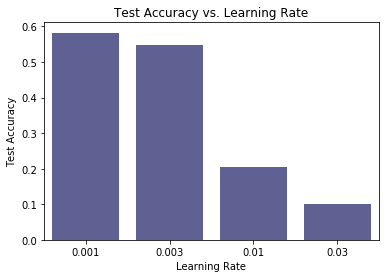

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_acc = hyperparam_df.groupby("learning_rate")[["best_acc"]].mean()
sns.barplot(mean_acc.index, mean_acc.best_acc, color="#555999")
plt.title("Test Accuracy vs. Learning Rate")
plt.ylabel("Test Accuracy")
plt.xlabel("Learning Rate")
plt.show()

Learning rates of 0.01 and 0.03 are clearly not converging. So these were eliminated from further search rounds.

Accuracy is only reached 60% for this two layer model. Training accuracy was not much higher, which suggests overfitting was not the problem.

Architectures with more features in the convolutional layers and more nodes in the fully connected layers tend to perform better. So in the next round a 3rd convolutional layer was added. At this time, the model is being trained on a CPU, so it is not practical to add more.

Alternative activation functions and optimisation algorithms will also be included in future searches.

### 2nd Round

In addition to specifying the number of filters, kernel size etc.., The followings options were added as Hyperparameters:
* Activation functions (relu, leaky relu or elu)
* Optimization algortithms (Adam, RMSProp or Nesterov)
* Using a reduced image patch, by removing border pixels (0, 1 or 2)
* Momentum for Batch Normalization

A 3rd convolutional layer was also added.

#### Table of results

In [115]:
hyperparam_df = pd.read_csv('./log/model_hyperparam_2.csv')
hyperparam_df.sort_values(by = ['best_acc'], ascending = False)

,activation,batch_size,best_acc,best_loss,best_train_acc,best_train_loss,filters1,filters2,filters3,full_hidd1,full_hidd2,ksize1,ksize2,ksize3,learning_rate,logdir,momentum,no_epochs,optimizer,patch_reduction
36,relu,64,0.7117,0.919377,0.754637,0.711197,96,96,64,100,125,3,5,3,0.0020,./log/run-20180128T123115/,0.90,12,adam,0
35,lrelu,128,0.7109,0.906563,0.758348,0.701145,32,64,64,125,80,5,3,5,0.0020,./log/run-20180128T120818/,0.99,13,adam,0
37,relu,128,0.7093,0.897427,0.743490,0.734613,96,128,96,100,100,5,3,4,0.0020,./log/run-20180128T133019/,0.90,11,adam,0
45,relu,32,0.7093,0.873374,0.722251,0.805403,96,64,64,60,80,5,4,4,0.0030,./log/run-20180128T174207/,0.99,12,adam,2
43,elu,256,0.7033,0.910308,0.734158,0.771317,96,48,128,100,125,5,5,4,0.0015,./log/run-20180128T162309/,0.90,13,adam,0
24,relu,128,0.7008,1.032702,0.755814,0.708703,96,96,128,60,125,5,5,5,0.0030,./log/run-20180128T080126/,0.95,13,adam,2
3,relu,32,0.6966,0.940112,0.704069,0.840530,64,48,64,125,125,4,5,5,0.0030,./log/run-20180127T213021/,0.99,12,adam,1
7,lrelu,32,0.6947,0.906030,0.692000,0.867232,96,48,96,60,80,3,5,3,0.0020,./log/run-20180127T225520/,0.95,10,adam,0
16,relu,64,0.6923,0.946625,0.724659,0.792448,16,64,128,100,125,5,5,5,0.0030,./log/run-20180128T035715/,0.95,12,adam,1
19,lrelu,32,0.6911,0.905265,0.746788,0.762321,32,128,128,100,125,4,5,5,0.0015,./log/run-20180128T043540/,0.90,10,nesterov,0


#### Graphical Analysis

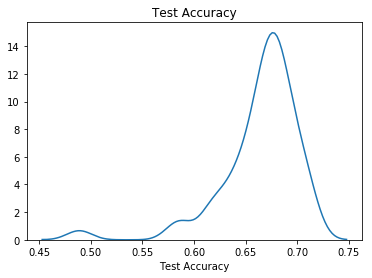

In [108]:
sns.distplot(hyperparam_df.best_acc, hist=False, rug=False)
plt.title("Test Accuracy")
plt.xlabel("Test Accuracy")
plt.show()

The distribution of Test Accuracy appears to be approximately Gaussian with a negative skew, from models that had difficulty converging.

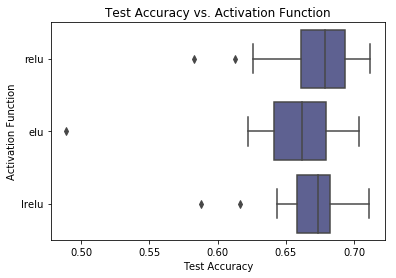

In [109]:
sns.boxplot(y=hyperparam_df.activation, x=hyperparam_df.best_acc, color="#555999", orient="h")
plt.title("Test Accuracy vs. Activation Function")
plt.xlabel("Test Accuracy")
plt.ylabel("Activation Function")
plt.show()

relu or leaky relu seems to offer better performance than elu, with leaky relu being more consistent.

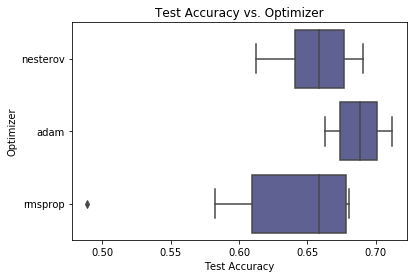

In [110]:
sns.boxplot(y=hyperparam_df.optimizer, x=hyperparam_df.best_acc, color="#555999", orient="h")
plt.title("Test Accuracy vs. Optimizer")
plt.xlabel("Test Accuracy")
plt.ylabel("Optimizer")
plt.show()

The Adam optimizer algorithm appears to be more succesful than Nesterov Accelerated Gradient or RMSProp in this case.

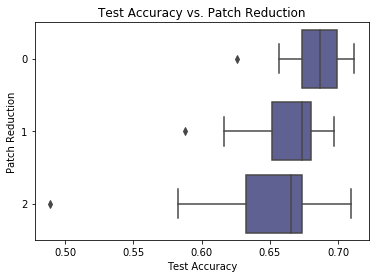

In [111]:
sns.boxplot(y=hyperparam_df.patch_reduction, x=hyperparam_df.best_acc, color="#555999", orient="h")
plt.title("Test Accuracy vs. Patch Reduction")
plt.xlabel("Test Accuracy")
plt.ylabel("Patch Reduction")
plt.show()

A patch reduction of 1, implies removal of the border pixels, resulting in the reduction of the image size from 32x32 to 30x30.

While other CNNs have had success with this approach, it would appear that there is no benefit with the current architecture.

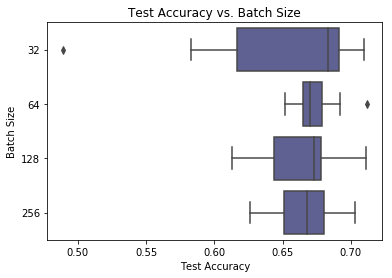

In [112]:
sns.boxplot(y=hyperparam_df.batch_size, x=hyperparam_df.best_acc, color="#555999", orient="h")
plt.title("Test Accuracy vs. Batch Size")
plt.xlabel("Test Accuracy")
plt.ylabel("Batch Size")
plt.show()

While a batch size of 32 may have higher median performance, the results are more eratic. A batch size of 64 is capable of achieving good results and is more reliable.

In [89]:
def subplot_performance(hyperparameter, title, ax):
    mean_acc = hyperparam_df.groupby(hyperparameter)[["best_acc"]].mean()
    sns.pointplot(mean_acc.index, mean_acc.best_acc, color="#555999", ax=ax)
    ax.set_xlabel(title)
    ax.set_ylabel("Mean Test Accuracy")

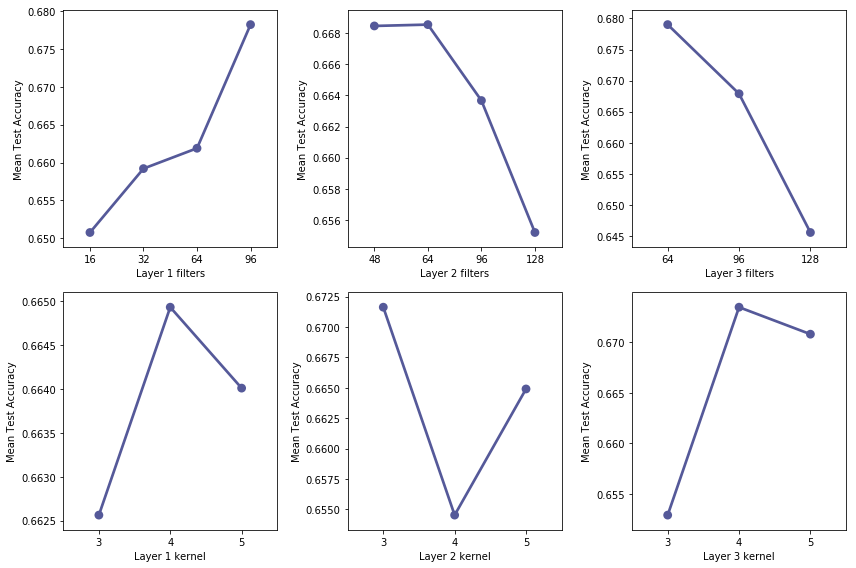

In [113]:
fig, axes = plt.subplots(2,3,figsize=(12,8))

subplot_performance("filters1","Layer 1 filters", axes[0,0])
subplot_performance("filters2","Layer 2 filters", axes[0,1])
subplot_performance("filters3","Layer 3 filters", axes[0,2])

subplot_performance("ksize1","Layer 1 kernel", axes[1,0])
subplot_performance("ksize2","Layer 2 kernel", axes[1,1])
subplot_performance("ksize3","Layer 3 kernel", axes[1,2])

plt.tight_layout()
plt.show() 

Increasing the number of filters in the first convolutional layer tends to improve performance. But surprisingly, the next two layers perform more poorly with more filters. Perhaps as a result of overfitting.

A 4x4 kernel has slightly better performance on average.

## Conclusion

With over 15 million hyperparameter combinations to possibly choose from, a grid search is clearly impractical. A randomized search allows some hyperparameter values be chosen by a process of elimination/selection. For example, early tests showed that learning rates of 0.01 and above were not converging. A full grid search would have wasted a lot of time attempting these learning rates with other hyperparameter settings.

The best test set accuracy achieved was 71% with 3 layers. This is some way off state of the art performance, which is not suprising given the simplicity of the model. The purpose of this study, was to investiagate hyperparameter search (and learn Tensorflow).

### Further work
Training on a GPU, e.g. using Google's cloud service, would allow more layers and a faster analysis of possible models.

Inception modules have been shown to be successful and could be an interesting addition.

Image pre-processing may also offer some advantages. For example, adding a greyscale channel or enhancing contrast.

Hyperparameter searches can also be carried out using a Gaussian Process Model, which aims to predict which set of Hyperparameters would be most likely to improve the current best performance.